In [226]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator
from keras.optimizers import RMSprop
import os
import cv2
from random import shuffle

In [227]:
# 0 cloudy
# 1 rain
# 2 shine 
# 3 sunrise 

training_data = []


In [228]:
def create_dataset(folder_dir,n):
  path = folder_dir 
  for image in os.listdir(path):
    try:
      img = cv2.imread(os.path.join(path,image))
      resize_img = cv2.resize(img, (224, 224)) 
      training_data.append([resize_img, n]) 
    except Exception as e:
      pass

In [229]:
create_dataset('/content/drive/My Drive/weather/cloudy',0)

In [230]:
create_dataset('/content/drive/My Drive/weather/rain',1)

In [231]:
create_dataset('/content/drive/My Drive/weather/shine',2)

In [232]:
create_dataset('/content/drive/My Drive/weather/sunrise',3)

In [233]:
len(training_data)

1123

In [234]:
shuffle(training_data)

In [235]:
X = []
y = []

In [236]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [237]:
X = np.array(X).reshape(-1, 224, 224, 3)

In [238]:
y = np.array(y).reshape(-1,1)

In [239]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [240]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [241]:
X_train = X_train/255.0
X_test = X_test/255.0

In [242]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [243]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

opt = RMSprop()

model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics=['accuracy'])

In [244]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 56, 56, 128)     

In [245]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)

In [246]:
fit_model = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=50),
                              epochs = 20, validation_data = (X_test,Y_test),
                              verbose = 2)

Epoch 1/20
 - 20s - loss: 3.0366 - accuracy: 0.3953 - val_loss: 0.9374 - val_accuracy: 0.4978
Epoch 2/20
 - 19s - loss: 0.8954 - accuracy: 0.5746 - val_loss: 0.7309 - val_accuracy: 0.6711
Epoch 3/20
 - 18s - loss: 0.8507 - accuracy: 0.6169 - val_loss: 0.7735 - val_accuracy: 0.7333
Epoch 4/20
 - 18s - loss: 0.7415 - accuracy: 0.6704 - val_loss: 0.5826 - val_accuracy: 0.7378
Epoch 5/20
 - 18s - loss: 1.0822 - accuracy: 0.6570 - val_loss: 0.6103 - val_accuracy: 0.7422
Epoch 6/20
 - 18s - loss: 0.5974 - accuracy: 0.7249 - val_loss: 0.6515 - val_accuracy: 0.7867
Epoch 7/20
 - 18s - loss: 0.6553 - accuracy: 0.7272 - val_loss: 0.5562 - val_accuracy: 0.7556
Epoch 8/20
 - 18s - loss: 0.6505 - accuracy: 0.7383 - val_loss: 0.6384 - val_accuracy: 0.7956
Epoch 9/20
 - 18s - loss: 0.6468 - accuracy: 0.7639 - val_loss: 0.5974 - val_accuracy: 0.7467
Epoch 10/20
 - 18s - loss: 0.5378 - accuracy: 0.7817 - val_loss: 0.6054 - val_accuracy: 0.7600
Epoch 11/20
 - 18s - loss: 0.6004 - accuracy: 0.7661 - val_

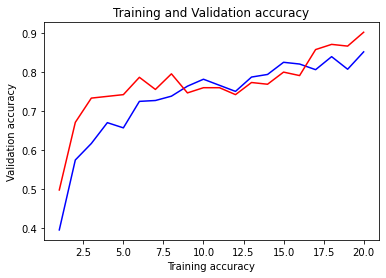

In [247]:
acc = fit_model.history['accuracy']
val_acc = fit_model.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Training and Validation accuracy')
plt.plot(epochs, acc, 'blue')
plt.xlabel('Training accuracy')
plt.plot(epochs, val_acc, 'red')
plt.ylabel('Validation accuracy')
plt.show()

In [248]:
def perform_test(folder_dir):
  test_image_path = folder_dir
  img = cv2.imread(test_image_path)
  test_img = cv2.resize(img, (224, 224))
  test_img = test_img.reshape(-1,224,224,3)
  test_img = test_img.astype('float32')
  test_img = test_img/255.0
  y_pred = model.predict_classes(test_img)
  return y_pred

In [249]:
pred_class = perform_test('/content/drive/My Drive/testimage3.jpg')
if pred_class == 0:
  print('Çloudy')
if pred_class == 1:
  print('Rain')
if pred_class == 2:
  print('Shine')
if pred_class == 3:
  print('Sunrise')


Sunrise
